# Description  
https://www.kaggle.com/mohansacharya/graduate-admissions

### Context  
This dataset is created for prediction of Graduate Admissions from an Indian perspective.  

### Content  
The dataset contains several parameters which are considered important during the application for Masters Programs.  
The parameters included are :  

1. GRE Scores ( out of 340 )
2. TOEFL Scores ( out of 120 )
3. University Rating ( out of 5 )
4. Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
5. Undergraduate GPA ( out of 10 )
6. Research Experience ( either 0 or 1 )
7. Chance of Admit ( ranging from 0 to 1 )

### Acknowledgements  
This dataset is inspired by the UCLA Graduate Dataset. The test scores and GPA are in the older format.  
The dataset is owned by Mohan S Acharya.  

### Inspiration  
This dataset was built with the purpose of helping students in shortlisting universities with their profiles. The predicted output gives them a fair idea about their chances for a particular university.  

### Citation  
Please cite the following if you are interested in using the dataset :  
Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019   

I would like to thank all of you for contributing to this dataset through discussions and questions. I am in awe of the number of kernels built on this dataset. Some results and visualisations are fantastic and makes me a proud owner of the dataset. Keep em' coming! Thank You.

## Task Details
Using the supplied predictive variables (GRE score, TOEFL score, University Rating, etc) to predict the likelihood of admission of a new candidate.

### Evaluation Criteria
The best model should be the one that evaluates to have the lowest RMSE overall, and please indicate the error you get on validation set containing the last 100 observations.

### Expected Submission
Please submit a Kernel where the final cell outputs the RMSE score on the final 100 observations.

In [570]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [474]:
#importing dataset
df = pd.read_csv('Admission_Predict.csv')

### Exploratory Data Analysis

In [475]:
#Serial No. will not be of our use, hence dropping the column
df = df.drop('Serial No.', axis = 1)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [476]:
#exploring dimensionality of the data
df.shape

(400, 8)

- We have 400 observations and 8 columns in the data.

In [477]:
#list of columns of the dataframe
cols = df.columns
cols

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [478]:
#summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


- The data has 400 observations, 7 features and the target variable 'Chance of Admit'. All the features are numerical.
- There is no missing data available in the data as all the features have same 400 observations.

In [479]:
#statistical summary of the dataframe
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


__Observations:__  
- The average GRE score is 316.8. The minimum GRE score is 290. The Maximum GRE score 340. 
- Average TOEFL Score is 107.41. Maximum TOEFL score is 120. The minimum TOEFL score is 92.
- The Maximum CGPA is 9.92. Minimum CGPA is 6.80. Average CGPA is 8.59.
- Values of University Rating, SOP, LOR ranges between 0 and 5.
- Average chance of admission is 72.43%

In [480]:
#first 10 rows data of the dataframe
df.head(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
5,330,115,5,4.5,3.0,9.34,1,0.90
6,321,109,3,3.0,4.0,8.20,1,0.75
7,308,101,2,3.0,4.0,7.90,0,0.68
8,302,102,1,2.0,1.5,8.00,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0.45


__Observations :__  
- Features have different ranges, which needs to be converted into roughly the same scale.
- GRE SCore, TOEFL Score, SOP, LOR, CGPA has continuous numerical data.
- University Rating, Research has discrete numerical data.

## Data Visualization

### Univariate Analysis : Drawing Distplot for each feature to see the probability of occurrance of each value in the feature

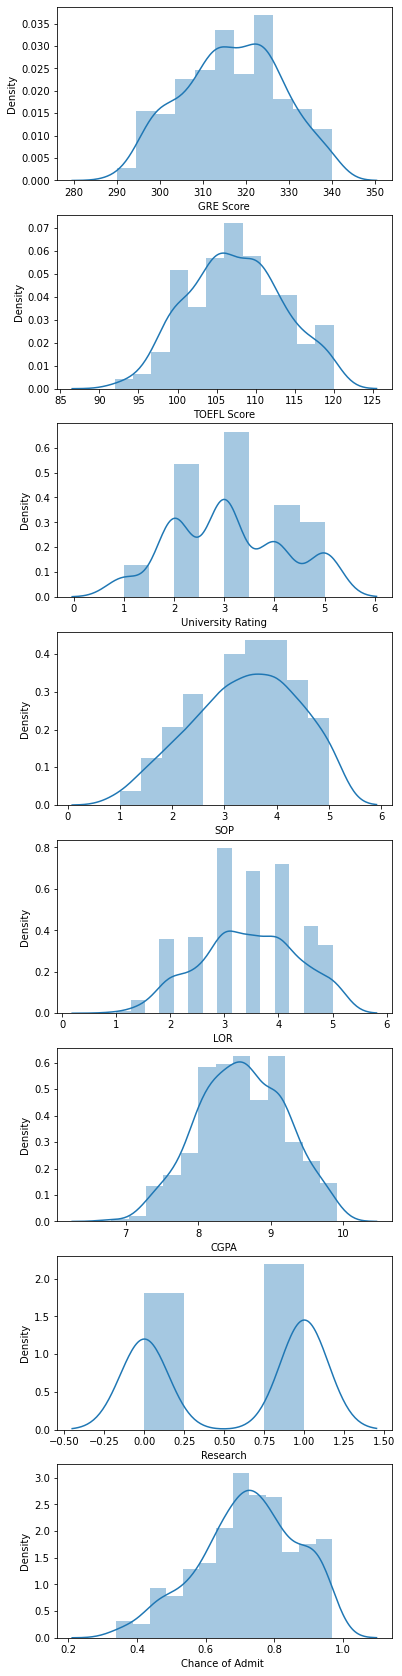

In [481]:
cont_num_cols = df.columns
l = len(cont_num_cols)
fig, ax = plt.subplots(l,1,figsize=(6,30))
for i, col in enumerate(cont_num_cols,0):
    sns.distplot(df[col], ax=ax[i])

#### The values of all the features are roughly normally distributed. Hence transformation is not required.

### Univariate Analysis: Drawing Boxplot for each feature to check teh outliers in the data

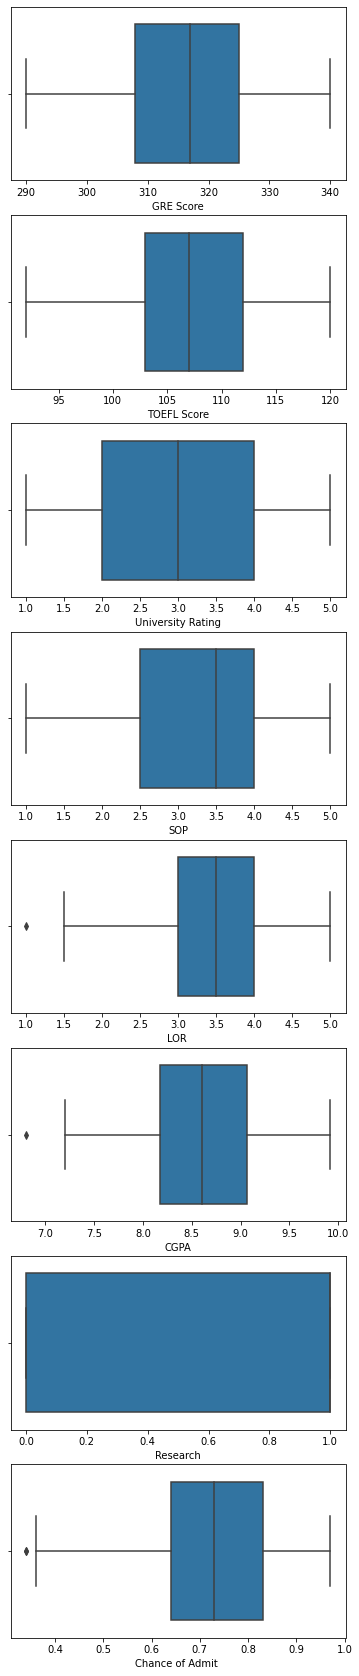

In [482]:
fig, ax = plt.subplots(l,1,figsize=(6,30))
for i, col in enumerate(cont_num_cols,0):
    sns.boxplot(df[col], ax=ax[i])

### Bivariate Analysis :

<AxesSubplot:xlabel='GRE Score', ylabel='Chance of Admit '>

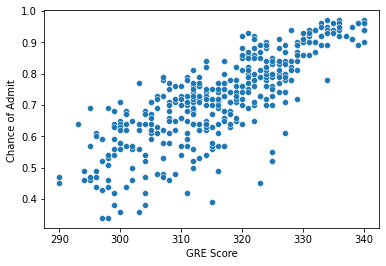

In [483]:
sns.scatterplot(df['GRE Score'], df['Chance of Admit '])

- With increase in GRE Score, chances of addmission is also getting increased.

<AxesSubplot:xlabel='TOEFL Score', ylabel='Chance of Admit '>

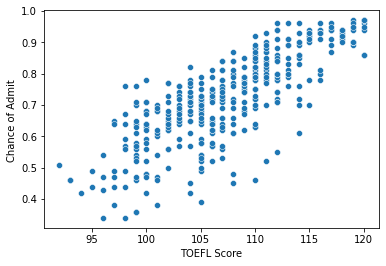

In [484]:
sns.scatterplot(df['TOEFL Score'], df['Chance of Admit '])

- With increase in TOEFL Score, chances of addmission is also getting increased.

<AxesSubplot:xlabel='University Rating', ylabel='Chance of Admit '>

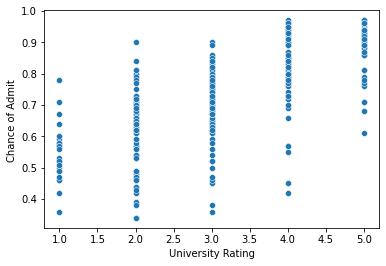

In [485]:
sns.scatterplot(df['University Rating'], df['Chance of Admit '])

- With increase in University Rating, chances of addmission is also getting increased.

<AxesSubplot:xlabel='SOP', ylabel='Chance of Admit '>

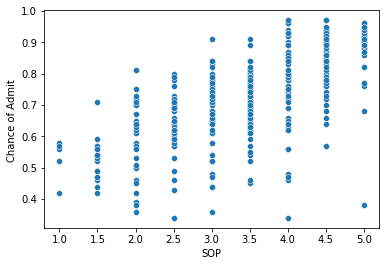

In [486]:
sns.scatterplot(df['SOP'], df['Chance of Admit '])

- With increase in Statement of Purpose Strength, chances of addmission is also getting increased.

<AxesSubplot:xlabel='LOR ', ylabel='Chance of Admit '>

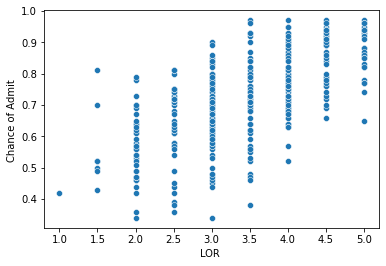

In [487]:
sns.scatterplot(df['LOR '], df['Chance of Admit '])

- With increase in Letter of Recommendation Strength, chances of admission is also getting increased.

<AxesSubplot:xlabel='CGPA', ylabel='Chance of Admit '>

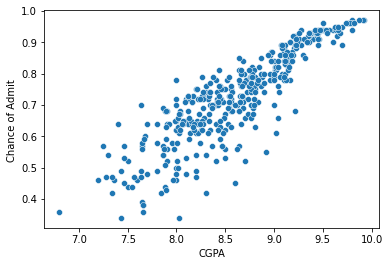

In [488]:
sns.scatterplot(df['CGPA'], df['Chance of Admit '])

- With increase in CGPA, chances of getting addmission is also getting increased.

<AxesSubplot:xlabel='Research', ylabel='Chance of Admit '>

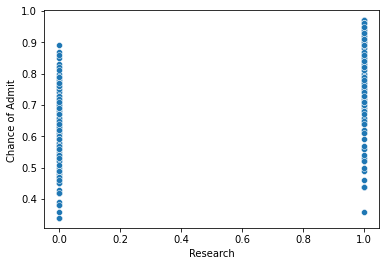

In [489]:
sns.scatterplot(df['Research'], df['Chance of Admit '])

In [490]:
df.Research.value_counts()

1    219
0    181
Name: Research, dtype: int64

- With increase in Research Experience, chances of getting addmission is also getting increased.

### Multivariate Analysis:

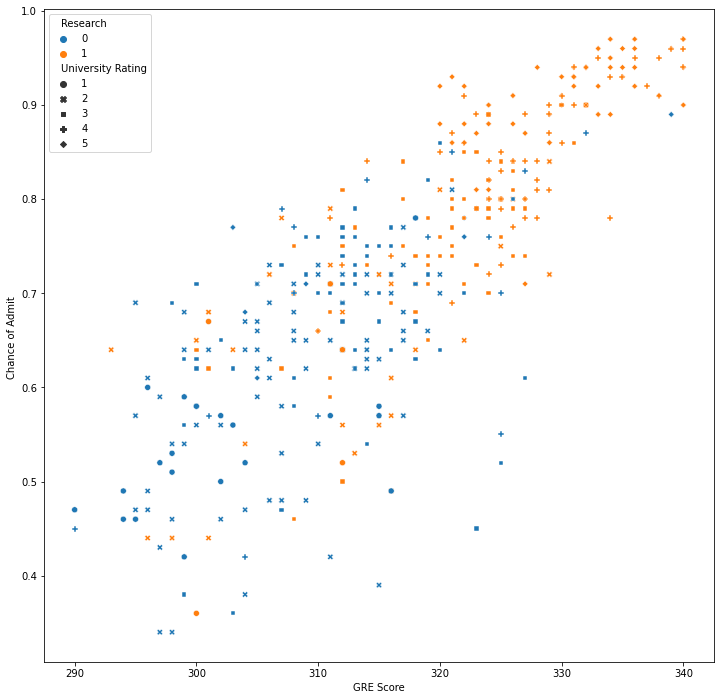

In [491]:
plt.figure(figsize = (12, 12))
sns.scatterplot(df['GRE Score'], df['Chance of Admit '], hue = df['Research'], style = df['University Rating'])
plt.show()

- With increase in GRE Score, Research and University Rating, the Chance of Admission is also increasing.

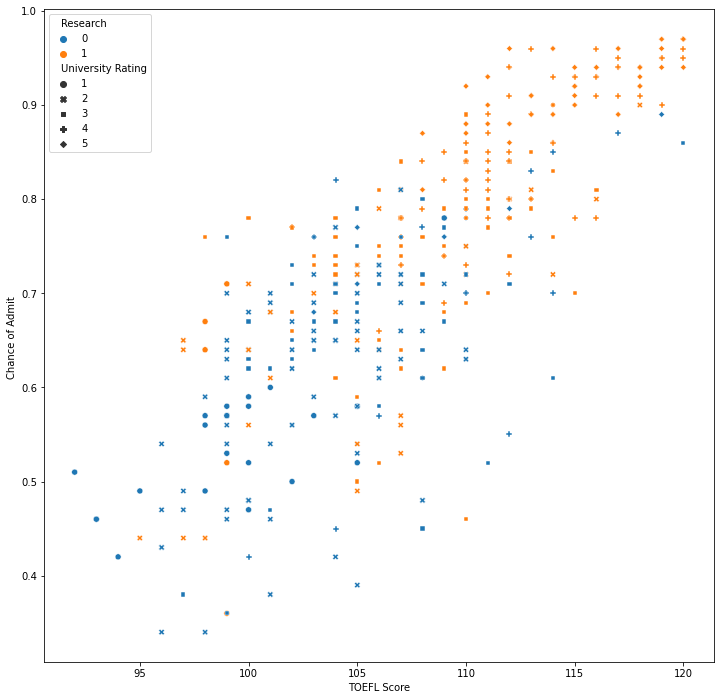

In [492]:
plt.figure(figsize = (12, 12))
sns.scatterplot(df['TOEFL Score'], df['Chance of Admit '], hue = df['Research'], style = df['University Rating'])
plt.show()

- With increase in TOEFL Score, Research and University Rating, the Chance of Admission is also increasing.

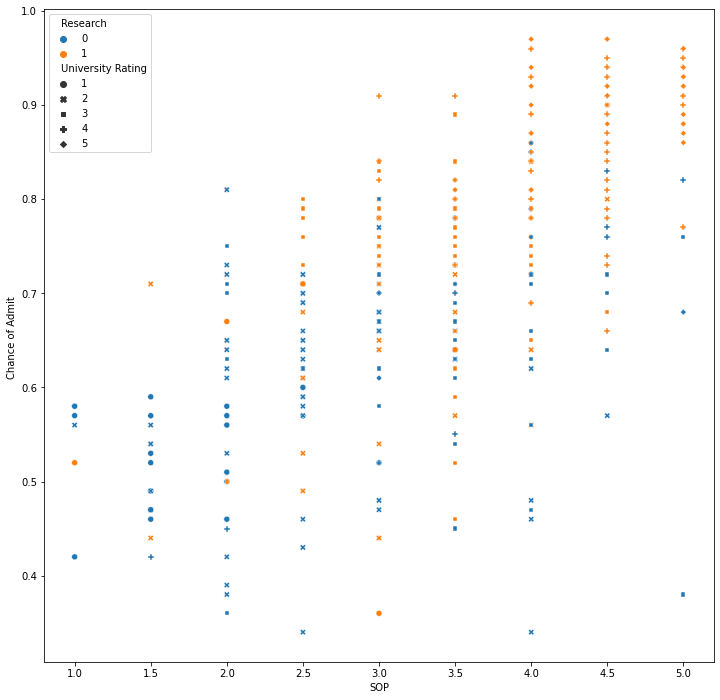

In [493]:
plt.figure(figsize = (12, 12))
sns.scatterplot(df['SOP'], df['Chance of Admit '], hue = df['Research'], style = df['University Rating'])
plt.show()

- With increase in SOP, Research and University Rating, the Chance of Admission is also increasing.

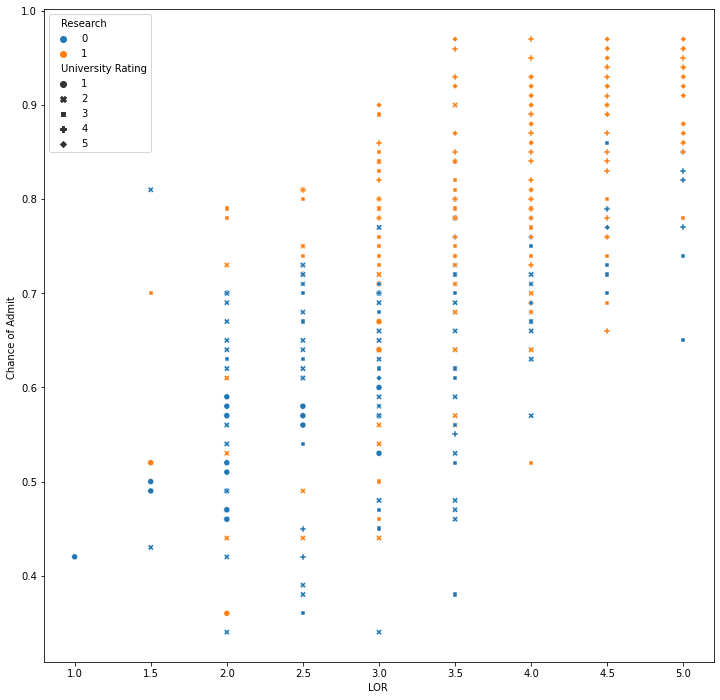

In [494]:
plt.figure(figsize = (12, 12))
sns.scatterplot(df['LOR '], df['Chance of Admit '], hue = df['Research'], style = df['University Rating'])
plt.show()

- With increase in LOR, Research and University Rating, the Chance of Admission is also increasing.

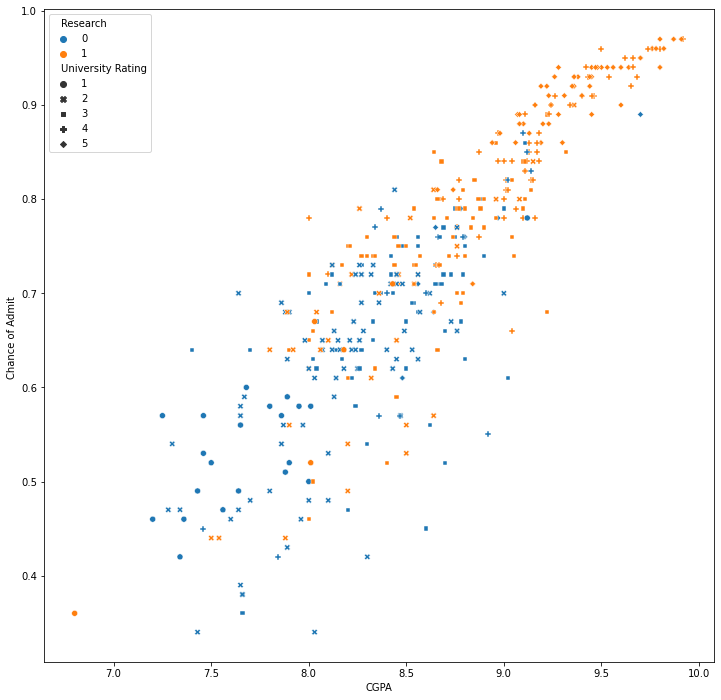

In [495]:
plt.figure(figsize = (12, 12))
sns.scatterplot(df['CGPA'], df['Chance of Admit '], hue = df['Research'], style = df['University Rating'])
plt.show()

- With increase in CGPA, Research and University Rating, the Chance of Admission is also increasing.

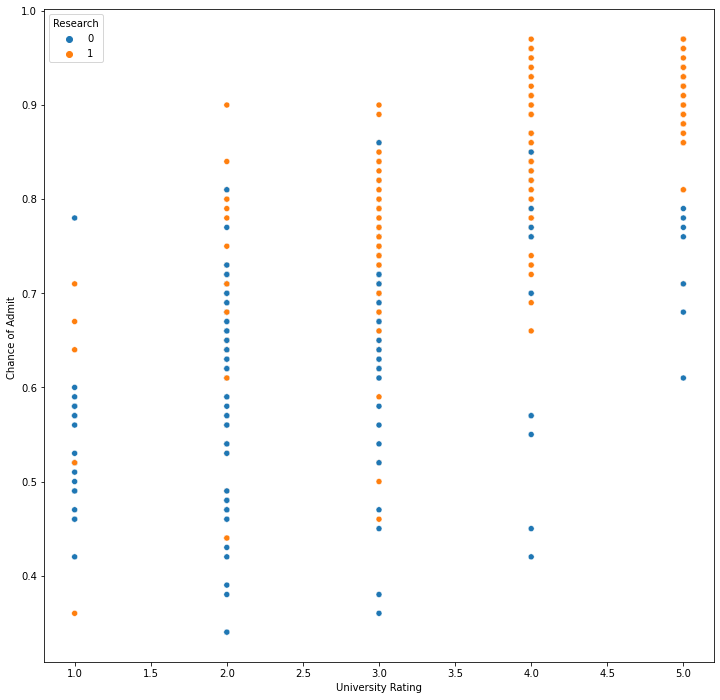

In [496]:
plt.figure(figsize = (12, 12))
sns.scatterplot(df['University Rating'], df['Chance of Admit '], hue = df['Research'])
plt.show()

- With increase in University Rating and Research, the Chance of Admission is also increasing.

## Feature Scaling

In [521]:
#separate features and target variable
x = df.drop(['Chance of Admit '], axis = 1)
y = df['Chance of Admit ']

In [522]:
#creating train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [571]:
x_train.shape

(280, 7)

In [572]:
x_test.shape

(120, 7)

In [523]:
stndrd = StandardScaler()
stndrd.fit(x_train)
x_stndrd_train = stndrd.transform(x_train)
x_stndrd_test = stndrd.transform(x_test)

## Model Creation

#### 1. Using Support Vector Machine

In [524]:
#create support vector regression object
model1 = SVR(kernel = 'rbf')

#model training
model1.fit(x_stndrd_train, y_train)

SVR()

In [525]:
#predict the target on the train dataset
predict_train1 = model1.predict(x_stndrd_train)

#model accuracy on training dataset
print('Training accuracy : ', model1.score(x_stndrd_train, y_train))

Training accuracy :  0.7663063642349393


In [526]:
#predict the target on the test dataset
predict_test1 = model1.predict(x_stndrd_test)

#model accuracy on testing dataset
print('Testing accuracy : ', model1.score(x_stndrd_test, y_test))

Testing accuracy :  0.7485341696540911


In [527]:
#mean absolute error
print('Mean absolute error : ', mean_absolute_error(y_test, predict_test1))
#mean squared error
print('Mean squared error : ', mean_squared_error(y_test, predict_test1))
#root mean squared error
print('Root Mean squared error : ', np.sqrt(mean_squared_error(y_test, predict_test1)))

Mean absolute error :  0.06227793674591039
Mean squared error :  0.005724172577459555
Root Mean squared error :  0.07565826179248077


### Using Support Vector Regression, we have Training accuracy = 76.63%, Testing accuracy = 74.85% and RMSE value = 0.0756

#### 2. Using Random Forest Regression

In [560]:
#create Random Forest regression estimator
model2 = RandomForestRegressor(n_estimators=500, max_depth = 3)

#model training
model2.fit(x_stndrd_train, y_train)

RandomForestRegressor(max_depth=3, n_estimators=500)

In [561]:
#predict the target on the train dataset
predict_train2 = model2.predict(x_stndrd_train)

#model accuracy on training dataset
print('Training accuracy : ', model2.score(x_stndrd_train, y_train))

Training accuracy :  0.8166381348046676


In [562]:
#predict the target on the test dataset
predict_test2 = model2.predict(x_stndrd_test)

#model accuracy on testing dataset
print('Testing accuracy : ', model2.score(x_stndrd_test, y_test))

Testing accuracy :  0.7770909249010652


In [550]:
#mean absolute error
print('Mean absolute error : ', mean_absolute_error(y_test, predict_test2))
#mean squared error
print('Mean squared error : ', mean_squared_error(y_test, predict_test2))
#root mean squared error
print('Root Mean squared error : ', np.sqrt(mean_squared_error(y_test, predict_test2)))

Mean absolute error :  0.04956956180736391
Mean squared error :  0.005020297494233117
Root Mean squared error :  0.07085405771184257


### Using Random Forest Regression, we have Training accuracy = 81.66%, Testing accuracy = 77.70% and RMSE value = 0.0708

#### 3. Using Linear Regression

In [532]:
#create linear regression estimator
model3 = LinearRegression()

#model training
model3.fit(x_stndrd_train, y_train)

LinearRegression()

In [533]:
#predict the target on the train dataset
predict_train3 = model3.predict(x_stndrd_train)

#model accuracy on training dataset
print('Training accuracy : ', model3.score(x_stndrd_train, y_train))

Training accuracy :  0.8019807331500791


In [534]:
#predict the target on the test dataset
predict_test3 = model3.predict(x_stndrd_test)

#model accuracy on testing dataset
print('Testing accuracy : ', model3.score(x_stndrd_test, y_test))

Testing accuracy :  0.7955991554684619


In [535]:
#mean absolute error
print('Mean absolute error : ', mean_absolute_error(y_test, predict_test3))
#mean squared error
print('Mean squared error : ', mean_squared_error(y_test, predict_test3))
#root mean squared error
print('Root Mean squared error : ', np.sqrt(mean_squared_error(y_test, predict_test3)))

Mean absolute error :  0.0494783871041959
Mean squared error :  0.004652821846481297
Root Mean squared error :  0.06821159612911354


### Among the 3 models we are getting highest accuracy and lower RMSE value in Linear Regression model i.e. 79.55%  and 0.0682 respectively. Hence it is the best model.

## Feature Importance

In [563]:
data_imp = pd.DataFrame({'feature': x.columns, 'importance':model3.coef_}).sort_values(by='importance', ascending=False)

In [564]:
data_imp

,feature,importance
5,CGPA,0.069904
0,GRE Score,0.020870
1,TOEFL Score,0.019058
4,LOR,0.012549
6,Research,0.009151
2,University Rating,0.005591
3,SOP,0.001019


<AxesSubplot:xlabel='feature', ylabel='importance'>

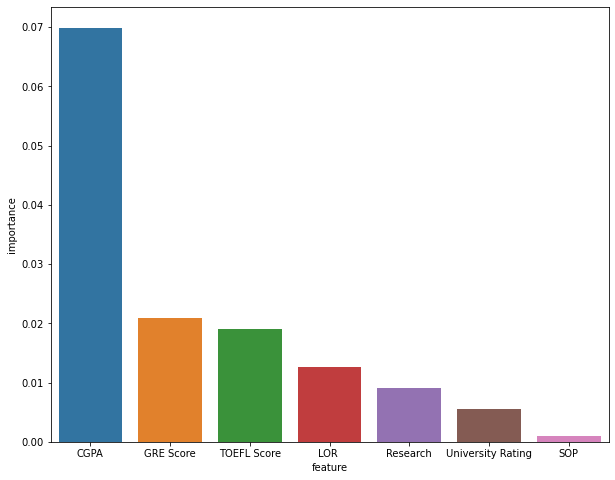

In [568]:
plt.figure(figsize=(10,8))
sns.barplot(x=data_imp['feature'].iloc[0:], y = data_imp['importance'].iloc[0:])

In [569]:
data_imp[data_imp['feature'] == 'GRE Score']

,feature,importance
0,GRE Score,0.02087


# Maximum Likelihood Estimation

In [574]:
x_test.shape

(120, 7)

In [575]:
val_data_feature = x_test[20:]
val_data_target = y_test[20:]

In [576]:
valid_predns = model3.predict(stndrd.transform(val_data_feature))

In [577]:
np.sqrt(mean_squared_error(val_data_target, valid_predns))

0.05952309799260396

### The error we get on validation set containing the last 100 observations is 0.0595 using Linear regression.